In [29]:
import ExTRA as ex
from astropy.io import fits
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import time


In [30]:
GAIA_EPOCH=Time('2017.5', format='jyear',scale="tcb")
GAIA_EPOCH_JY=GAIA_EPOCH.jyear
GAIA_EPOCH_JD=GAIA_EPOCH.jd

m1_MS = 0.76  # Primary star mass from paper Table 3
bh3_ra_deg = 294.8278502411 # Right Ascension from paper Table 2
bh3_dec_deg = 14.9309190720 # Declination from paper Table 2

lin.ra                         1.50624  ±  0.00708     
lin.dec                       -0.03341  ±  0.00674     
lin.parallax                   0.71520  ±  0.00871     
lin.mura                     -30.29679  ±  0.00477     
lin.mudec                   -148.62246  ±  0.00427 

In [31]:
#Gaia Single Star Solution
g_asc=bh3_ra_deg
g_dec=bh3_dec_deg
g_par=1.68 #mas
g_mua=-30.29679
g_mud=-148.62246
g_stand=np.array([g_asc,g_dec,g_par,g_mua,g_mud])

In [32]:
#read
rvdata=fits.open("data/GaiaBH3/bh3rv.fit")[1].data
astrodata=fits.open("data/GaiaBH3/bh3ast.fit")[1].data
#header
rv_names=rvdata.names[1:]
ast_names=astrodata.names

In [33]:
ast=[]
for name in ast_names:
    ast.append(astrodata.field(name))
ast=np.array(ast)
rv=[]
for name in rv_names:
    rv.append(rvdata.field(name))
rv=np.array(rv)

In [ ]:
relative_time=Time(ast[0], format='jd', scale='tcb').jyear-GAIA_EPOCH.jyear
gaia_angle=ex.angle_trafo(np.radians(ast[-1]))

t_gaia=ast[0]
A2=relative_time
A3=np.cos(gaia_angle)
A4=np.sin(gaia_angle)
A5=ast[3]
A6=A3*A2
A7=A4*A2
A8=ast[1]
A9=ast[2]
gaia=[A3,A4,A5,A6,A7,A8,A9]

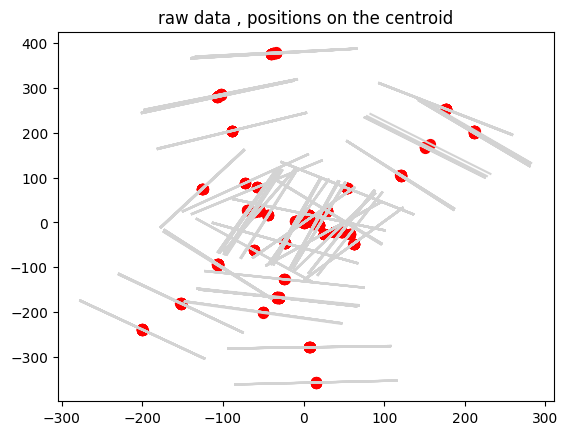

In [83]:
raw_2d=ex.hip_2d(gaia)
err_2d=np.array([raw_2d[1],raw_2d[3]])
ex.plot_hip(*raw_2d,size=100,s=50)
plt.title("raw data , positions on the centroid")
plt.show()

In [84]:
g_sss=ex.standard_model(*g_stand,t_gaia,ex.earth_position(t_gaia),tangential=True,Sepoch=GAIA_EPOCH_JD)

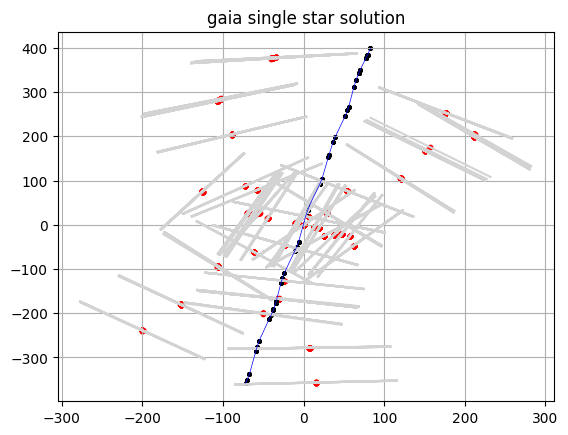

In [93]:
ex.plot_hip(*raw_2d,size=100,s=10)
plt.scatter(*g_sss,s=5,c="k")
plt.plot(*g_sss,c="b",linewidth=0.5)
#plt.axis("equal")
plt.title("gaia single star solution")
plt.grid()
plt.show()

In [94]:
planet_residual=ex.abs_res(A8,g_stand,np.array([g_asc,g_dec,0,0,0]),gaia)

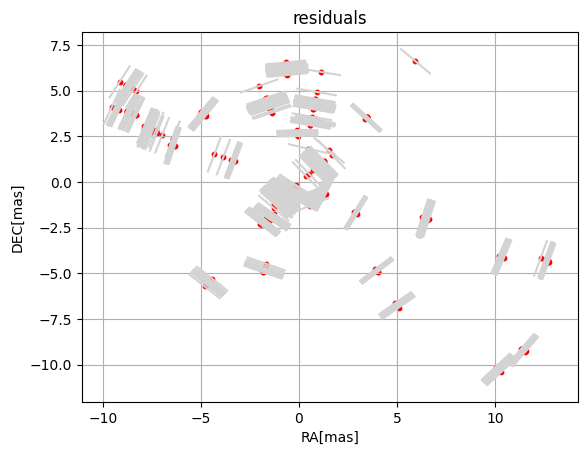

In [103]:
res_astrometric=gaia
res_astrometric[-2]=planet_residual

testing=ex.hip_2d(res_astrometric)


ex.plot_hip(*testing)
plt.title("residuals")
plt.ylabel("DEC[mas]")
plt.xlabel("RA[mas]")
plt.grid()